# HW1 Part 01 - Data Exploration with Descriptive Statistics and Visualizations

TOTAL POINT: 50


**Objective of this Exercise**

In class, we discussed the importance of exploratory data analysis (EDA) and effective visualization. The goal is to conduct EDA on the Boston Housing Price dataset using Python, following an EDA checklist. You will explore the data, ask relevant questions, and analyze variation and covariation. Visualize your findings with a focus on good visualization practices, attention theory, and visual salience. Additionally, perform a brief feature engineering exercise.

## Data for this exercise

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). The description of the data is provided together with the actual data and should be the starting point for your analysis of the data.

## TASK 01 Descriptive statistics of the boston data (POINT: 02)

**TASK 1.1:** Explore the boston data using descriptive statistics. Calculate the central tendency with the mean and median, the variability through the standard deviation and the IQR, as well as the range of the data. The real task is understanding something about the data from these results. For example, what can you learn about the CRIM feature from the mean and the median?

In [47]:
import pandas as pd
from sklearn import datasets
import numpy as np

# # first we load the data and print description
# boston = datasets.load_boston()
# print(boston.DESCR)

from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target
print(boston.DESCR)

# we convert the data into a data frame and use the convenient describe function from pandas
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# write your one line code for  descriptive statistics

#ANSWER

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [2]:
#Descriptive Stats
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [3]:
boston_df.var(numeric_only=True)

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


Some things we can learn from the summary statistics:
- The mean of CRIM is much larger than the median (50%). The together with the very large max value this is a strong indicator that the distribution is not symmetric around the mean and likely as a long right-tail. Since the median is close the the minimal value, this also indicates that a lot of data is located in a small region on the left side of the distribution. Together with the description of the data, this means that there are many regions with a low crime rate and a relatively small portion of regions has a higher crime rate.
- The data indicates that RM is likely symmetric around the mean. This is indicated because the mean and the median are roughly equal, and the distance from the lower quartile (25%) is similar to the distance of the upper quartile (75%) from the median. Whether RM follows a gaussian distribution cannot be evaluated without statistical tests or at least a visualization. Given that this feature models the number of rooms, it also makes sense that the data is not dominated by outliers.
- CHAS seems to have a strange distribution, because the min and the upper quartile of the same value of 0. This fits the description that this is just a dummy variable used as control.

## TASK 2: Ask Right Question (POINTS: 2+2+2=6)

You are now going to ask two questions.

**Remember** that the first question will focus on variation using a chosen variable. The second question will explore covariation, using **one variable from the first question** and another variable. After formulating the questions, you will plot the results.

**TASK 2.1:** Show all the columns of the dataset

In [5]:
# Show all the columns first
boston_df.columns
#ANSWER

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


### Question 1: Variation

**TASK 2.2:** Write a question and include a one-line explanation of why it is an important question.


**Your Question:** What is the variation in *AGE* of the houses in Boston? 

**Importance:** The age of a house can significantly impact its value, maintenance needs, and potential for renovations. Older homes may have unique character but might require more upkeep, while newer homes often come with modern amenities and energy efficiency.


In [6]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Question 2: Covariation

**TASK 2.2:** Write a question and include a one-line explanation of why it is an important question.


**Your Question:** Is there an relation of the *AGE* of a house with the *TAX* linked to the house? Does the age of the property influence property tax?

**Importance:** Property tax is a crucial source of revenue for local governments, funding essential services like education, infrastructure, and public safety.

# TASK 03: Data Analysis Part 01 (1+2+(2+3)+2=10)


### Question 01 Visualization

Now, for your above Question 01 on Variation: Create a plot to show the distribution of the variable you have chosen and visualize its variation. Remember to make it visually appealing (this applies to every plot in this exercise).

**TASK 3.1: Write in one line: the variable(s) name that you are plotting below.**

* Variable 1: AGE
* Variable 2: TAX

**TASK 3.2:** Create a plot to show the distribution of the variable you have chosen for Question 01 and visualize its variation.

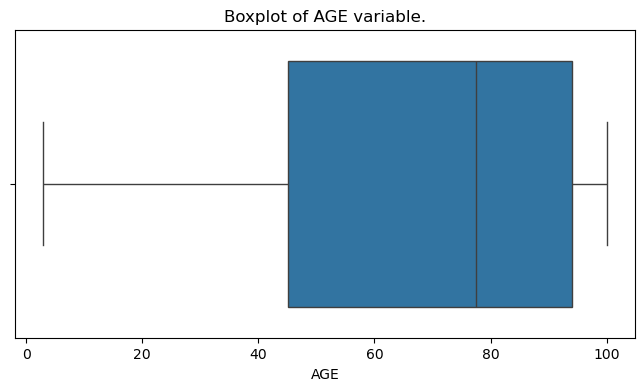

In [7]:
#plot here. Import necessary libraries if needed.
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of your chosen variable

plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=boston_df,x='AGE')
plt.title("Boxplot of AGE variable.")
plt.show()

### Question 02 Covariation

Now,
* **TASK 3.3:**Calculate the correlation between the two variables you chose in Question 2.Provide an brief interpretation of the correlation coefficient.

After that, you have to plot the relationship between these two variables.

In [8]:
## We can use the Spearman Correlation Coefficient to find the relationship between the two variables.
spearmanDef = "Spearman's coefficient measures the strength and direction of the monotonic relationship between two ranked variables. Its values range from -1 to +1. Values closer to +1 or -1 indicate a stronger relationship, while values near 0 suggest a weak or no correlation."
print("Defination:",spearmanDef)
print("---")
print("""+1: Perfect positive correlation; as one variable increases, the other also increases.
0: No correlation; changes in one variable do not predict changes in the other.
-1: Perfect negative correlation; as one variable increases, the other decreases.""")
print("---")
# Calculate the correlation between the variables
from scipy.stats import spearmanr
corr, _ = spearmanr(boston_df['AGE'],boston_df['TAX'])
print(f'Spearman\'s correlation: %.3f'%corr)


# Interpretation
interpretation = f"The spearman coefficient is {corr}, indicating a moderate positive correlation between the age of a property and its tax value, suggesting that as the age of a house increases, property taxes tend to rise as well. Older houses may have increased in value over time, increasing their taxes"
print(interpretation)


Defination: Spearman's coefficient measures the strength and direction of the monotonic relationship between two ranked variables. Its values range from -1 to +1. Values closer to +1 or -1 indicate a stronger relationship, while values near 0 suggest a weak or no correlation.
---
+1: Perfect positive correlation; as one variable increases, the other also increases.
0: No correlation; changes in one variable do not predict changes in the other.
-1: Perfect negative correlation; as one variable increases, the other decreases.
---
Spearman's correlation: 0.526
The spearman coefficient is 0.5263664437266887, indicating a moderate positive correlation between the age of a property and its tax value, suggesting that as the age of a house increases, property taxes tend to rise as well. Older houses may have increased in value over time, increasing their taxes


**TASK 3.4:** Plot the relationship between these two variables.

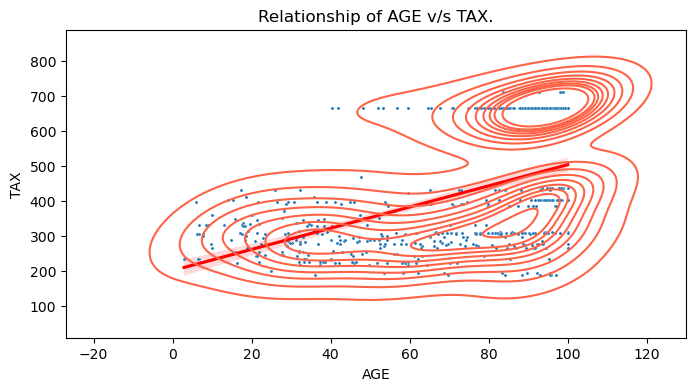

In [9]:
# Plotting the relationship between these two variables

plt.figure(figsize=(8,4),dpi=100)
sns.regplot(data=boston_df,x='AGE',y='TAX',color='red',scatter=False)
sns.kdeplot(data=boston_df,x='AGE',y='TAX',color='tomato')
sns.scatterplot(data=boston_df,x='AGE',y='TAX',s=5)
plt.title("Relationship of AGE v/s TAX.")
plt.show()


# TASK 04: Understanding Data Types and Visualization (POINTS: 1+1+5+2+1+4+4=18)

Understanding data types is important! Your next task is to choose any **categorical variable** from the dataset.
* Display a table showing both the frequency and relative frequency of that variable.
* Finally, create a plot to visualize the distribution of the categorical variable

## Categorical Data Analysis

**TASK 4.1**: Display the data types of each column in the dataset

In [10]:
# Display the data types of each column in boston_df

boston_df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

**TASK 4.2:** Write down the name of the categorial variable that you have chosen:

Answer: RAD

**TASK 4.3**: Display a table showing both the frequency and relative frequency of that variable.

In [11]:
print("Frequency of RAD categorical variable:")
boston_df['RAD'].value_counts().to_frame()

Frequency of RAD categorical variable:


,count
RAD,
24,132
5,115
4,110
3,38
6,26
2,24
8,24
1,20
7,17


In [12]:
print("Relative Frequency of RAD categorical variable in %.")
boston_df['RAD'].value_counts(normalize=True).to_frame()*100

Relative Frequency of RAD categorical variable in %.


,proportion
RAD,
24,26.086957
5,22.727273
4,21.739130
3,7.509881
6,5.138340
2,4.743083
8,4.743083
1,3.952569
7,3.359684


**TASK 4.4**: Create a plot to visualize the distribution of the categorical variable

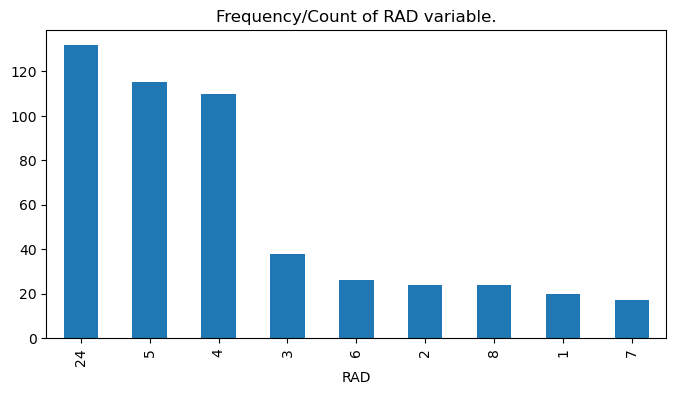

In [13]:
# Plotting the categorical variable:
plt.figure(figsize=(8,4),dpi=100)
boston_df['RAD'].value_counts().plot(kind='bar')
plt.title("Frequency/Count of RAD variable.")
plt.show()


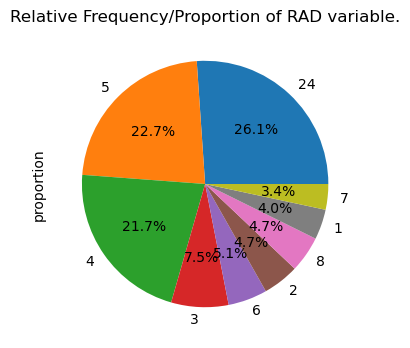

In [14]:
plt.figure(figsize=(8,4),dpi=100)
boston_df['RAD'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Relative Frequency/Proportion of RAD variable.")
plt.show()

## Binning Continuous Data

How can you categorize any two continuous variables from the dataset into discrete bins?
Your next task is:
*  Use an appropriate binning method to create categories, and
* then visualize the distribution of these categories to enhance your understanding of the data.

*** TASK 4.5: Write down the name of the two continous variables that you have chosen:***

Answer: *AGE* and *NOX*

**TASK 4.6**: Use an appropriate binning method to create categories for two continuous variables of your choice from the dataset.

In [33]:
# Binning based on range of 10 years
ageBins = pd.cut(boston_df['AGE'],bins=[i for i in range(0,110,10)],labels=[str(i)+'-'+(str(i+10)) for i in range(0,100,10)])

In [41]:
# Binning based on quantiles
noxBins = pd.qcut(boston_df['NOX'],q=10)

**TASK 4.7**: Visualize the distribution of these binned categories to enhance your understanding of the data.

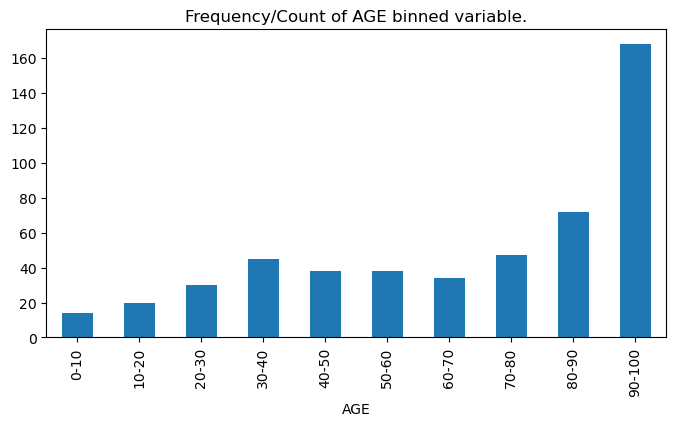

In [49]:
# Visualize the distribution of first binned variable
plt.figure(figsize=(8,4),dpi=100)
ageBins.value_counts(sort=False).plot(kind='bar')
plt.title("Frequency/Count of AGE binned variable.")
plt.show()

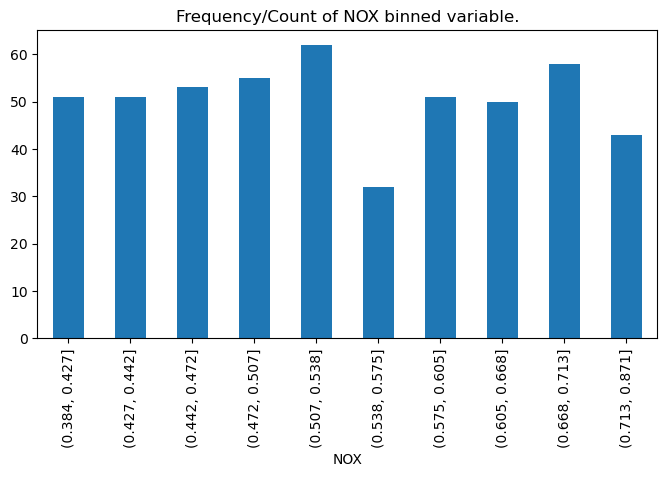

In [50]:
# Visualize the distribution of second binned variable
plt.figure(figsize=(8,4),dpi=100)
noxBins.value_counts(sort=False).plot(kind='bar')
plt.title("Frequency/Count of NOX binned variable.")
plt.show()

# TASK 05: Good Visualizations: StoryTelling, Attention and Valiance (POINTS: 4+3=7)

The Python library ```matplotlib``` is great for creating all kinds of visualizations. There are even libraries on top of ```matplotlib``` that facilitate relatively complex visualizations in a single line of code like ```seaborn```.


**Task 5.1:** Create an impactful visualization that effectively communicates a key relationship within the dataset. You can use any variables you want, or you can also perform feature engineering by adding or modifying any variable.

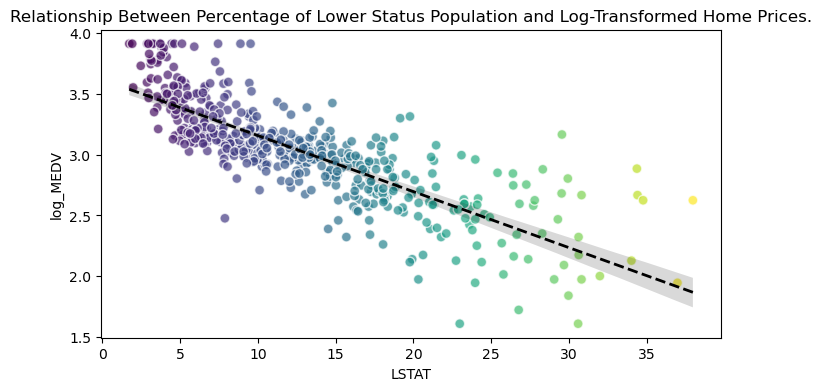

In [57]:
# Plot the Visualization.
boston_df['MEDV'] = boston.target
boston_df['log_MEDV'] = np.log(boston_df['MEDV'])
# boston_df['log_MEDV'] = boston_df['MEDV']

plt.figure(figsize=(8,4),dpi=100)
plt.scatter(boston_df['LSTAT'], boston_df['log_MEDV'],c=boston_df['LSTAT'],alpha=0.7,s=50,edgecolor='w')
sns.regplot(x='LSTAT', y='log_MEDV', data=boston_df, scatter=False, color='black', line_kws={"lw": 2, "ls": "--"})
plt.title("Relationship Between Percentage of Lower Status Population and Log-Transformed Home Prices.")
plt.show()


**Task 5.2:** Now, Explain how you apply principles of visual attention and salience to enhance the viewer's understanding of this relationship and the story it tells.

The visualization clearly shows a negative relationship between LSTAT (percentage of lower-status population) and log-transformed MEDV (log of home price). As the percentage of lower-status individuals in a neighborhood increases, the median home price tends to decrease. This highlights how socioeconomic factors are often tied to property values.

Story:
The relationship between LSTAT (percentage of lower-status population) and MEDV (median value of homes) in the Boston Housing dataset tells a socioeconomic story about the connection between community wealth and housing prices.

* There is a negative correlation between LSTAT and MEDV: as the percentage of lower-status population in a neighborhood increases, the median home price tends to decrease. This suggests that socioeconomic factors play a significant role in determining the affordability of housing.

* This relationship speaks to broader issues of urban inequality: wealthier individuals typically live in higher-priced homes, often in neighborhoods with fewer lower-income individuals. On the other hand, lower-income individuals typically reside in areas where housing is more affordable but where the quality of life might be lower.

Visual Attention:
* The color gradient applied to the points (from blue to red) naturally draws the viewer's attention to the LSTAT values. The warmer colors (purple) indicate areas with a higher percentage of lower-status individuals, while cooler colors (yellow) represent areas with fewer lower-status people.
* The black dashed regression line serves as an immediate visual  to the overall negative correlation between LSTAT and log(MEDV). This trendline communicates the relationship between the two variables: as LSTAT increases, log(MEDV) decreases, showing the central idea.
* The alpha setting of 0.7 (transparency) ensures that data points don’t overlap a lot. It gives a clear view of denser regions while still maintaining visibility for individual points.

# TASK 06: Missing Data Check, Outlier Detection and Feature Engineering (POINTS: 2+2+1+2= 07)


**TASK 6.1:** Check for missing values in the dataset

In [19]:
# Check for missing values
print("There are no missing values in the dataset")
boston_df.isna().sum()

There are no missing values in the dataset


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

**TASK 6.2:** Check for outliers for RM Variable in the dataset

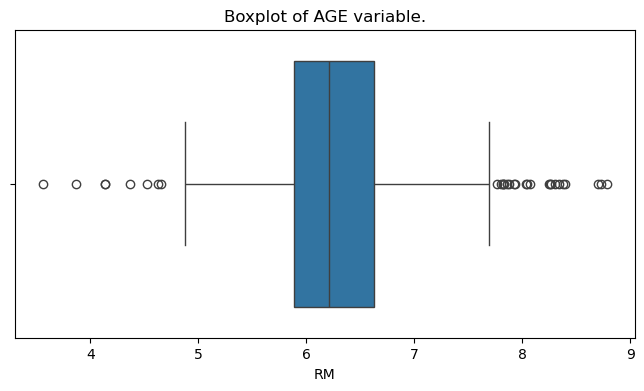

In [20]:
# Create a box plot for RM to detect outliers

plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=boston_df,x='RM')
plt.title("Boxplot of AGE variable.")
plt.show()

**TASK 6.3:** Is there any outlider?

ANSWER: There are a lot of outliers.

**TASK 6.4:** Create a new feature by calculating the ratio of the average number of rooms (RM) to the percentage of lower status of the population (LSTAT).

In [21]:
# Creating a new feature: RM to LSTAT ratio
boston_df = boston_df.assign(rm_to_pop_ratio = boston_df['RM']/boston_df['LSTAT'])


# Display modified DataFrame (only head)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,rm_to_pop_ratio
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,1.320281
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0.702516
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,1.782878
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,2.380272
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,1.340901


# THE END of HW1 Part 01